In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_csv('StorePurchaseData.csv')

X = training_data.iloc[:, :-1].values
y = training_data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [3]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train);

In [6]:
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]

In [7]:
print(y_pred)
print(y_prob)

[0 0 0 0 1 0 1 1]
[0.4 0.2 0.  0.2 0.8 0.2 1.  0.8]


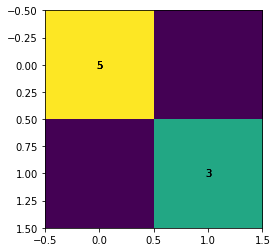

In [15]:
c = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
ax.imshow(c);
for i, (y_t_val, y_p_val) in enumerate(zip(y_test.flatten(), y_pred.flatten())):
    ax.text(y_t_val, y_p_val, c[y_t_val, y_p_val], va='center', ha='center')

In [24]:
def predictWithProb(age, salary):
    new_pred = classifier.predict(sc.transform(np.array([[age, salary]])))
    new_prob = classifier.predict_proba(sc.transform(np.array([[age, salary]])))
    return new_pred, new_prob[:,1]

predictWithProb(20, 50000)

(array([0]), array([0.2]))